In [ ]:
# this program classifies MNIST handwritten digits

! pip install tensorflow keras numpy emnist matplotlib

In [ ]:
# import packages 

import numpy as np
import emnist # our data set
import matplotlib.pyplot as plt # graph
from keras.models import Sequential # ANN architecture
from keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D, Flatten
from keras.utils import  to_categorical

convnet_load = False

In [ ]:
# Example Convolutional Neural Network

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())  
model.add(Dense(256, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(47, activation='softmax'))

convnet_load = True

In [ ]:
# build a model with 3 layers
# 2 layers with 64 neurons and the relu function
# 1 layer with 10 neurons amd softmax function 

model=  Sequential()
model.add(Dense(256, activation='sigmoid', input_dim = 784))
model.add(Dropout(0.2))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(47, activation='softmax'))

convnet_load = False

In [ ]:
# load data set
train_images, train_labels = emnist.extract_training_samples('balanced')
test_images, test_labels = emnist.extract_test_samples('balanced')

# normalize the images pixels from ([0, 255] to [-0.5, 0.5])

train_images = (train_images/255) - 0.5
test_images = (test_images/255) - 0.5

if convnet_load:
    train_images = train_images[:, :, :, np.newaxis]
    test_images = test_images[:, :, :, np.newaxis]
else:
    # flatten the images. 28x28 image into 28^2 = 784 dimensional vector
    # to pass into neural network

    train_images = train_images.reshape((-1, 784))
    test_images = test_images.reshape((-1, 784))

# print the shape to check

print(train_images.shape)
print(test_images.shape)


In [ ]:
# compile the model
# the loss funasures how good the model did on trainingction me
# and improve using optimizer

model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy', # this allows us to use classes that are greater than 2
    metrics = ['accuracy']
)

In [ ]:
# train model

model.fit(
    train_images,
    to_categorical(train_labels),
    epochs = 100, # the number of iterations over the entire dataset 5
    batch_size=32
)

In [ ]:
# evaluate the model

model.evaluate(
    test_images,
    to_categorical(test_labels)
)

In [ ]:
model.save_weights(r"C:\Neural_Network_Model_Weights\model.h5")

In [ ]:
# predict on the 1st 5 test images

prediction = model.predict(test_images[:15])
print(np.argmax(prediction, axis=1))
print(test_labels[:15])

In [ ]:
for i in range(15): #to see the images
    if convnet_load:
        first_image = test_images[i,:, :, 0]
    else:            
        first_image = test_images[i]
    first_image = np.array(first_image, dtype ='float')
    pixels = first_image.reshape((28,28))
    plt.imshow(pixels,cmap='gray')
    plt.show()

In [ ]:
! pip install pillow

Available letters/digits: 0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt
You drew a X


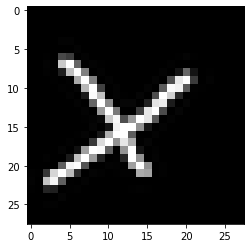

You drew a T


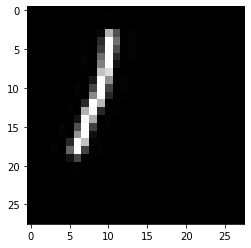

You drew a I


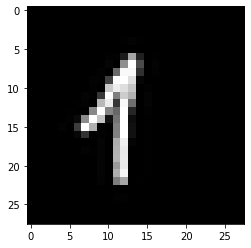

You drew a J


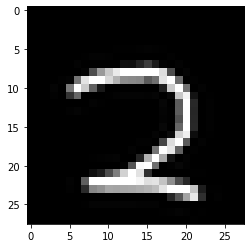

You drew a F


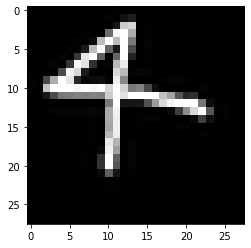

You drew a F


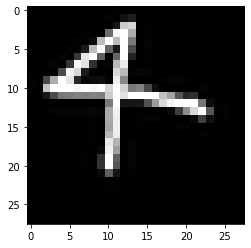

You drew a F


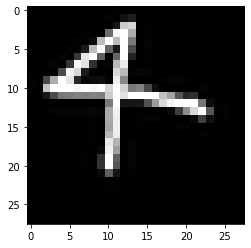

You drew a 8


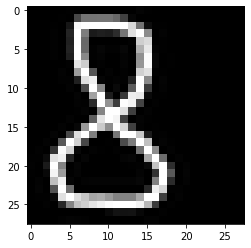

You drew a g


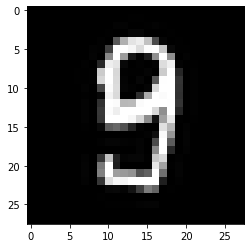

You drew a g


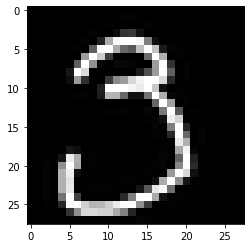

You drew a 3


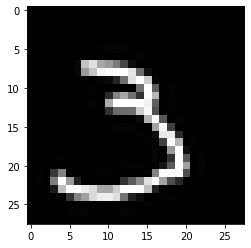

You drew a 3


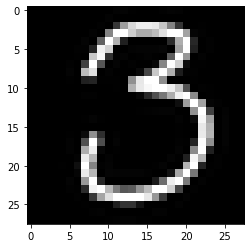

You drew a g


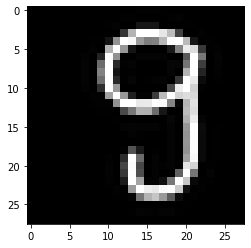

You drew a 4


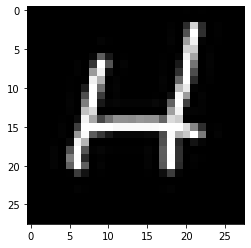

You drew a B


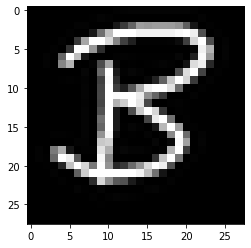

You drew a Y


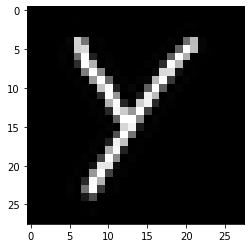

You drew a N


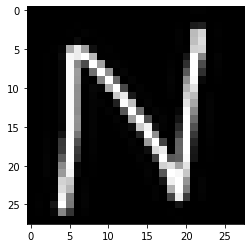

You drew a t


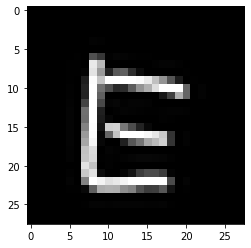

You drew a F


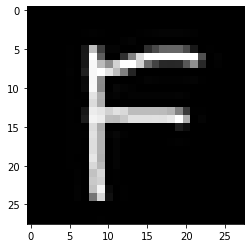

You drew a 5


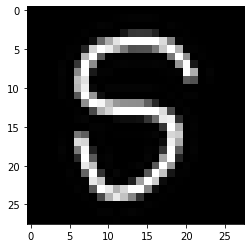

You drew a 5


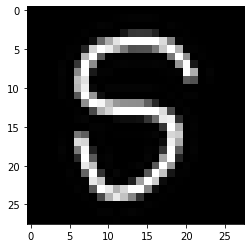

You drew a 7


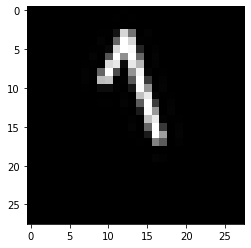

In [ ]:
from PIL import Image, ImageDraw
import PIL
from tkinter import *
import numpy as np
from PIL.Image import ANTIALIAS

width = 200  # canvas width
height = 200  # canvas height
center = height // 2
resized_width = 28
resized_height = 28
black = 0 # canvas back
x_cursor_last = 0
y_cursor_last = 0
is_drawing = False
line_width = 2*5

def predict():
    resized_image = np.array(output_image.resize((resized_width, resized_height), ANTIALIAS), dtype ='float')
    resized_image = (resized_image/255) - 0.5
    if convnet_load:
        input_image = resized_image[np.newaxis, :, :, np.newaxis]
    else:
        input_image = resized_image.reshape((-1, 784))
    prediction = model.predict(input_image)
    predicted_class = np.argmax(prediction, axis=1)
    print('You drew a ' + classes_strings[predicted_class[0]])
    plt.imshow(resized_image,cmap='gray')
    plt.show()


def paint(event):
    if is_drawing:
        global x_cursor_last, y_cursor_last
        canvas.create_line(x_cursor_last, y_cursor_last, event.x, event.y, fill='white', width=line_width)
        canvas.create_oval(x_cursor_last-line_width/2, y_cursor_last-line_width/2, 
                           x_cursor_last+line_width/2, y_cursor_last+line_width/2, fill='white', width=0)
        canvas.create_oval(event.x-line_width/2, event.y-line_width/2, 
                           event.x+line_width/2, event.y+line_width/2, fill='white', width=0)

        draw.line([x_cursor_last, y_cursor_last, event.x, event.y], fill='white', width=line_width)
        draw.ellipse([event.x-line_width/2, event.y-line_width/2, 
                      event.x+line_width/2, event.y+line_width/2], fill='white', width=0)
        draw.ellipse([x_cursor_last-line_width/2, y_cursor_last-line_width/2, 
                      x_cursor_last+line_width/2, y_cursor_last+line_width/2], fill='white', width=0)

        x_cursor_last, y_cursor_last = event.x, event.y

def clear():
    global output_image, draw
    canvas.delete('all')
    output_image = PIL.Image.new("L", (width, height), black)
    draw = ImageDraw.Draw(output_image)

def activate_paint_mode(event):
    global x_cursor_last, y_cursor_last, is_drawing
    x_cursor_last = event.x
    y_cursor_last = event.y
    is_drawing = True


def deactivate_paint_mode(event):
    global x_cursor_last, y_cursor_last, is_drawing
    x_cursor_last = event
    is_drawing = False


master = Tk()
# create a tkinter canvas to draw on
canvas = Canvas(master, width=width, height=height, bg='black')
canvas.pack()

# create an empty PIL image and draw object to draw on
output_image = PIL.Image.new("L", (width, height), black)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
canvas.bind("<B1-Motion>", paint)
canvas.bind("<Button-1>", activate_paint_mode)
canvas.bind("<ButtonRelease-1>", deactivate_paint_mode)

# add a button to save the image
button = Button(text="predict", command=predict)
button.pack()

button_clear = Button(text="clear", command=clear)
button_clear.pack()

numbers_ascii = np.arange(48, 58)
uppercase_letters = np.arange(65, 91)
lowercase_letters = np.array([97, 98, 100, 101, 102, 103, 104, 110, 113, 114, 116])
classes = np.concatenate((numbers_ascii, uppercase_letters, lowercase_letters), axis=0)
classes_strings = ''.join(map(chr, classes))
print("Available letters/digits: " + classes_strings)

master.mainloop()